In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import Imputer

import seaborn as sns

from pandas.plotting import scatter_matrix


from sklearn.ensemble import ExtraTreesRegressor

import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBRegressor


from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

%matplotlib inline

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('dataset_4.csv')

In [3]:
ID_col = ['Unnamed: 0',"Unnamed: 0.1", "STATION_ID","STATION_ID_2","STATION_ID_3","STATION_ID_4", 'KEY', 'KEY_2_x', 'KEY_2_y']
target_col = ["SPEED_AVG", 'SPEED_MAX','SPEED_MIN','SPEED_SD']
cat_col = ["EVENT_TYPE","WEATHER", 'TIME_INTERVAL']
time_col = ['DATETIME_UTC','START_DATETIME_UTC','END_DATETIME_UTC', "DATETIME_UTC_WEATHER"]
other_col = ['KM_START', 'KM_END']
num_col= list(set(list(df.columns))-set(ID_col)-set(target_col)-set(time_col)-set(cat_col))

In [4]:
df = pd.read_csv('dataset_4.csv', dtype={col: np.float32 for col in num_col})

In [6]:
df.head()


,Unnamed: 0,Unnamed: 0.1,START_DATETIME_UTC,END_DATETIME_UTC,EVENT_DETAIL,EVENT_TYPE,KM_END,KM_START,KEY,KEY_2_x,...,ROAD_TYPE,STATION_ID,STATION_ID_2,STATION_ID_3,STATION_ID_4,TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE,WEATHER,DATETIME_UTC_WEATHER
0,0,2482395,2018-09-01 08:24:14,2018-09-01 09:18:18,14.0,Ostacolo_in_carreggiata,387.0,387.0,0.0,0_387,...,1.0,STATION_17,STATION_18,NaN,NaN,23.0,23.0,21.0,QuasiSereno,2018-09-01 09:00:00
1,1,2497216,2018-09-01 08:24:14,2018-09-01 09:18:18,14.0,Ostacolo_in_carreggiata,387.0,387.0,0.0,0_387,...,1.0,STATION_17,STATION_18,NaN,NaN,23.0,23.0,21.0,QuasiSereno,2018-09-01 09:00:00
2,2,2553594,2018-09-03 07:56:15,2018-09-03 19:05:49,2.0,Manutenzione_opere_in_verde,385.0,383.0,0.0,0_385,...,1.0,STATION_17,STATION_18,NaN,NaN,21.0,23.0,21.0,QuasiSereno,2018-09-03 08:00:00
3,3,2673596,2018-09-04 08:01:51,2018-09-04 19:24:16,2.0,Manutenzione_opere_in_verde,387.0,385.0,0.0,0_387,...,1.0,STATION_17,STATION_18,NaN,NaN,21.0,22.0,21.0,QuasiSereno,2018-09-04 08:00:00
4,4,2677224,2018-09-04 08:01:51,2018-09-04 19:24:16,2.0,Manutenzione_opere_in_verde,387.0,385.0,0.0,0_387,...,1.0,STATION_17,STATION_18,NaN,NaN,21.0,22.0,21.0,QuasiSereno,2018-09-04 08:00:00


In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,EVENT_DETAIL,KM_END,KM_START,KEY,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,...,DISTANCE_FROM_POINT,LENGTH_KM,WEEK_DAY,DELTA_TIME_FROM_START,EMERGENCY_LANE,LANES,ROAD_TYPE,TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
count,61118.000000,6.111800e+04,61073.000000,61118.000000,61118.000000,61118.000000,61118.000000,61118.000000,61118.000000,61118.000000,...,61118.000000,61118.000000,61118.000000,61118.000000,61118.000000,61118.000000,61118.000000,60848.000000,60848.000000,60848.000000
mean,30558.500000,5.526864e+06,18.473942,590.454468,569.495850,148.928319,580.186890,183.287050,23.707564,120.598685,...,10.708711,20.952583,2.438872,193.205734,0.444468,1.997906,0.538336,17.154171,18.265596,13.869001
std,17643.391213,5.558551e+06,18.893148,322.752411,308.295197,171.639979,315.443298,37.771299,8.683663,37.391353,...,34.927990,58.073166,1.797079,450.750000,0.496763,0.819795,0.610493,6.337464,6.758934,5.527316
min,0.000000,1.900000e+01,0.000000,12.000000,4.000000,0.000000,17.000000,60.675000,0.000000,59.866000,...,-5.000000,-8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-13.000000,-14.000000,-14.000000
25%,15279.250000,8.408782e+05,6.000000,412.000000,398.000000,16.000000,404.000000,157.930227,17.899267,82.518000,...,-1.000000,0.000000,1.000000,16.900000,0.000000,1.000000,0.000000,13.000000,14.000000,10.000000
50%,30558.500000,3.413433e+06,12.000000,582.000000,573.000000,46.000000,577.000000,188.720227,23.418653,129.440000,...,2.000000,2.000000,2.000000,33.900002,0.000000,2.000000,0.000000,18.000000,19.000000,14.000000
75%,45837.750000,8.920364e+06,25.000000,639.000000,620.000000,262.000000,637.000000,213.157009,28.761324,150.474000,...,8.000000,16.000000,4.000000,50.700001,1.000000,3.000000,1.000000,22.000000,23.000000,18.000000
max,61117.000000,2.033919e+07,86.000000,2000.000000,2000.000000,578.000000,1997.000000,292.534400,144.304678,275.060000,...,442.000000,442.000000,6.000000,1440.000000,1.000000,3.000000,2.000000,36.000000,35.000000,29.000000


In [8]:
df[df.isnull().WEATHER == True].shape[0]

283

In [9]:
np.sum(df.isnull())

Unnamed: 0                   0
Unnamed: 0.1                 0
START_DATETIME_UTC           0
END_DATETIME_UTC             0
EVENT_DETAIL                45
EVENT_TYPE                   0
KM_END                       0
KM_START                     0
KEY                          0
KEY_2_x                      0
DATETIME_UTC                 0
KM                           0
SPEED_AVG                    0
SPEED_SD                     0
SPEED_MIN                    0
SPEED_MAX                    0
N_VEHICLES                   0
KEY_2_y                      0
DISTANCE_FROM_POINT          0
LENGTH_KM                    0
WEEK_DAY                     0
TIME_INTERVAL                0
DELTA_TIME_FROM_START        0
EMERGENCY_LANE               0
LANES                        0
ROAD_TYPE                    0
STATION_ID                   0
STATION_ID_2               776
STATION_ID_3              6744
STATION_ID_4             15019
TEMPERATURE                270
MAX_TEMPERATURE            270
MIN_TEMP

In [5]:
#a cazzo di cane
df = df.drop(['STATION_ID_2','STATION_ID_3','STATION_ID_4'], axis = 1)

In [6]:
df.dropna(inplace = True)
df.shape[0]

60790

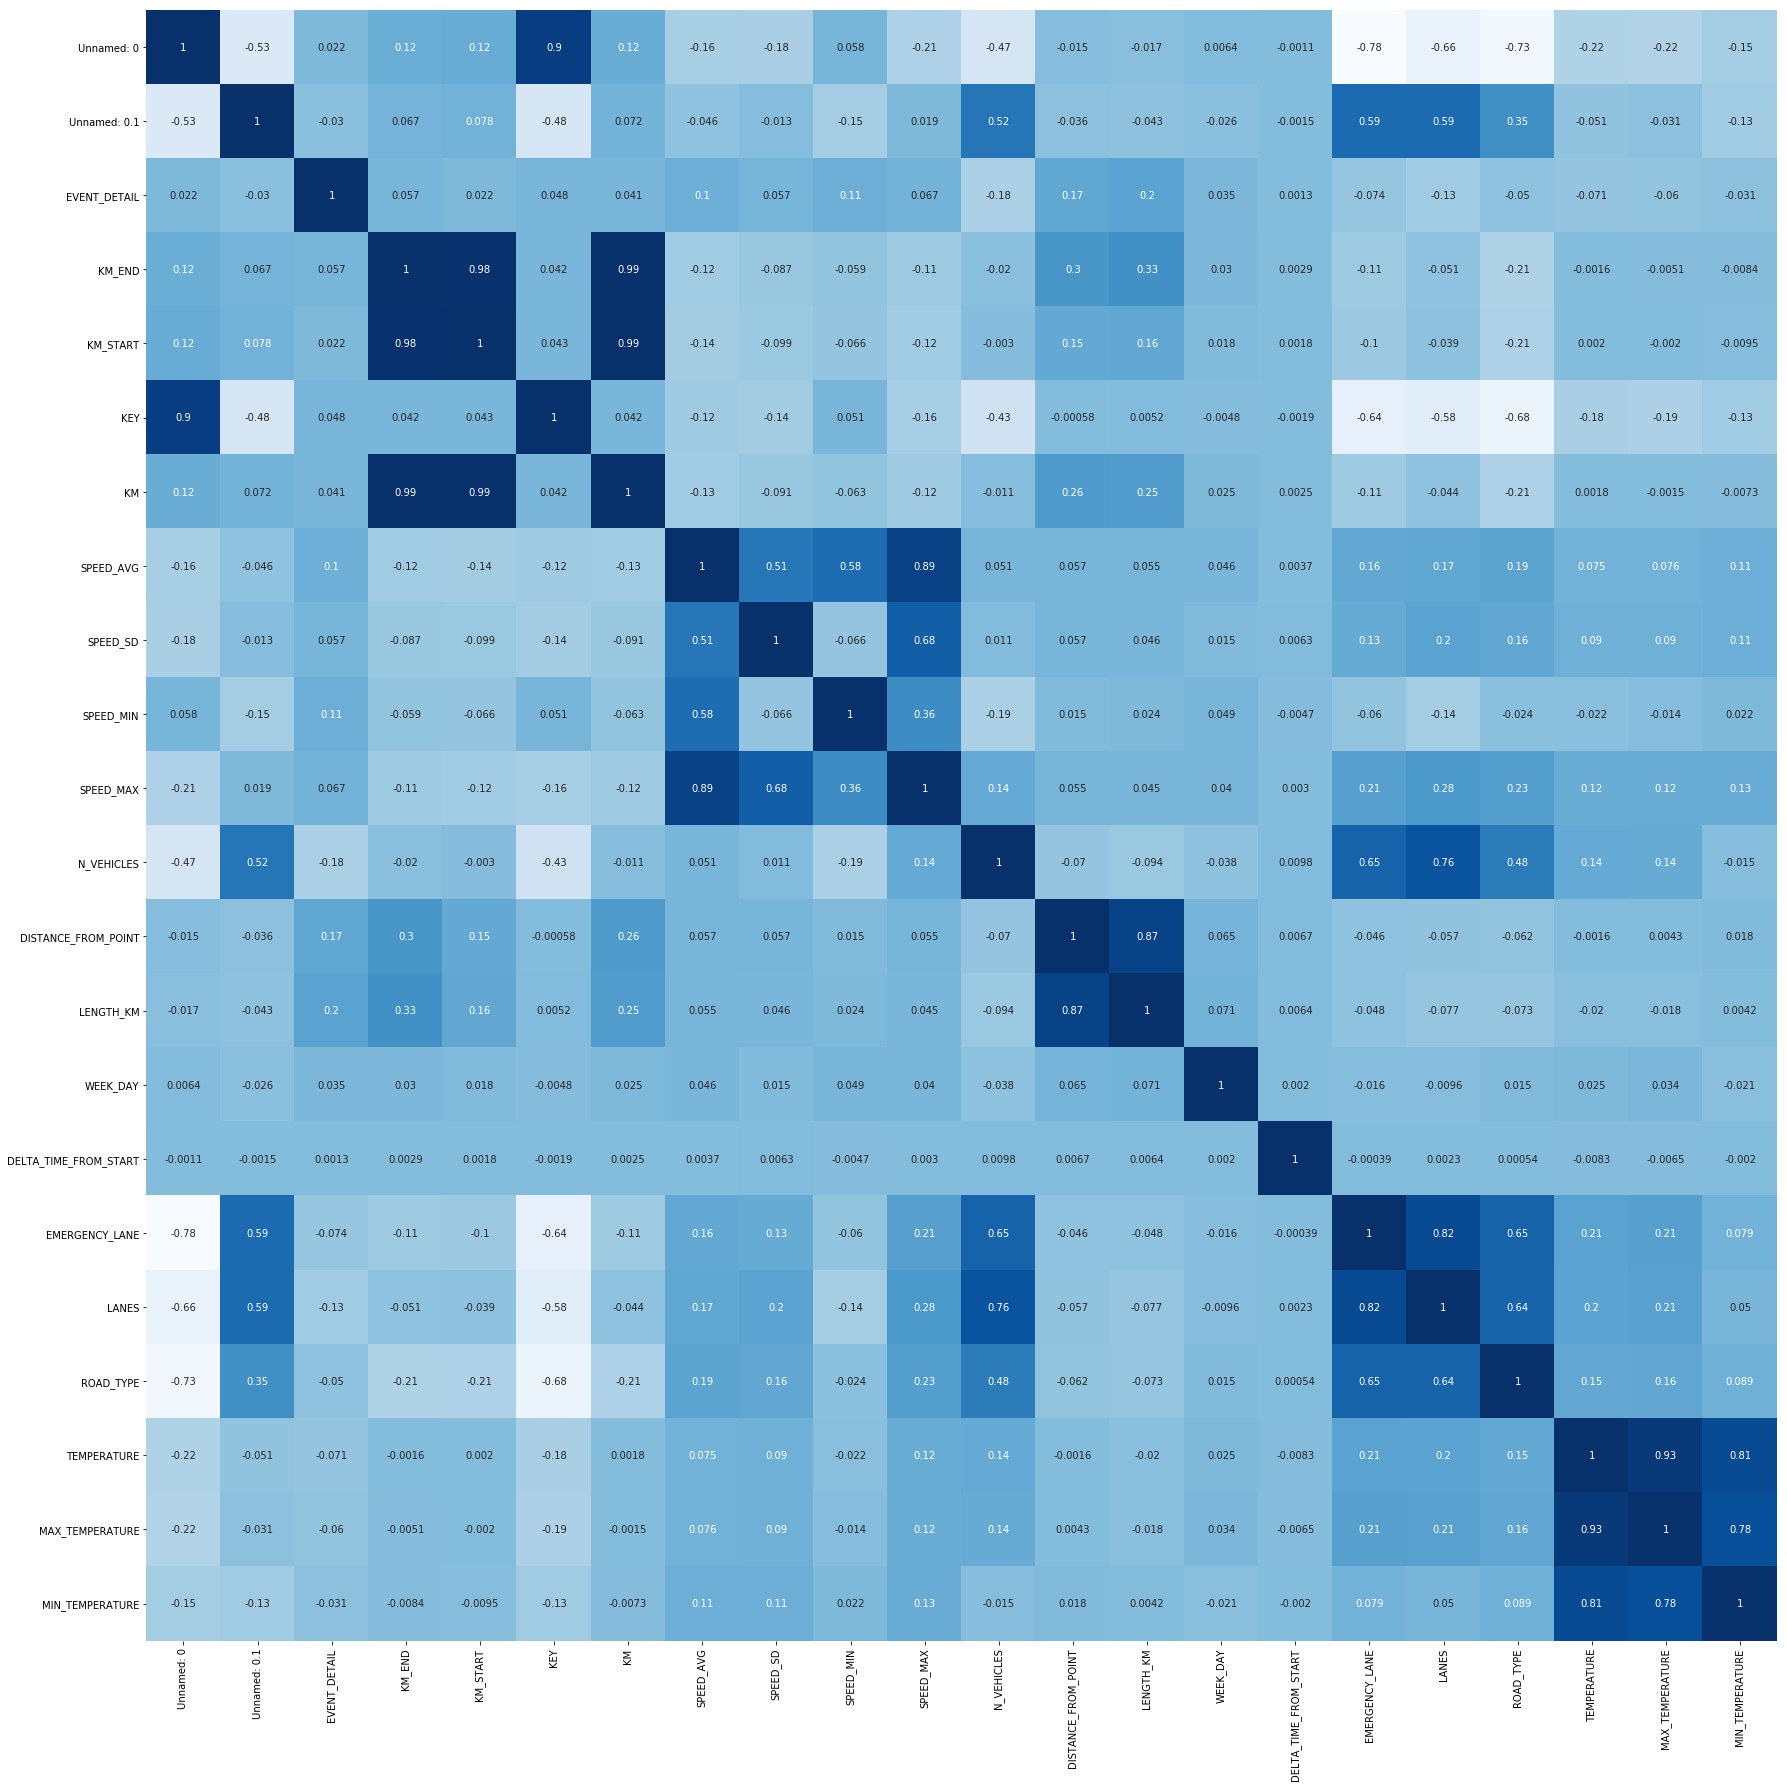

In [12]:
cov=df.corr(method='pearson')
plt.figure(figsize = (30,30))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21137a20>,
      dtype=object)

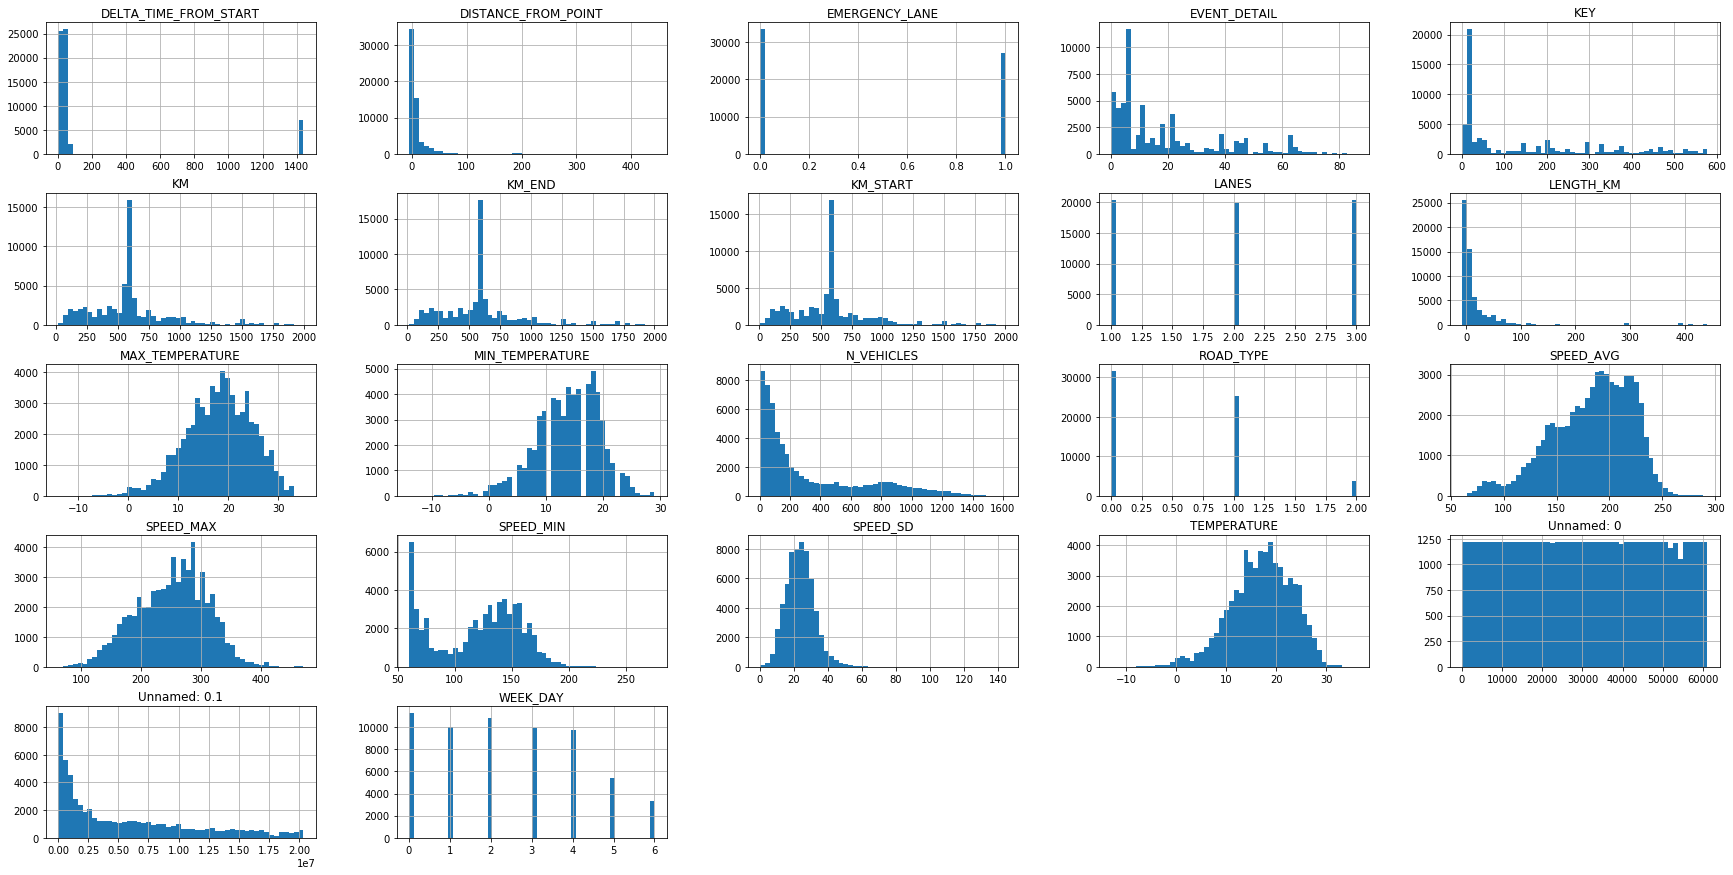

In [13]:
df.hist(bins = 50, figsize=(30,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2051ae48>,
      dtype=object)

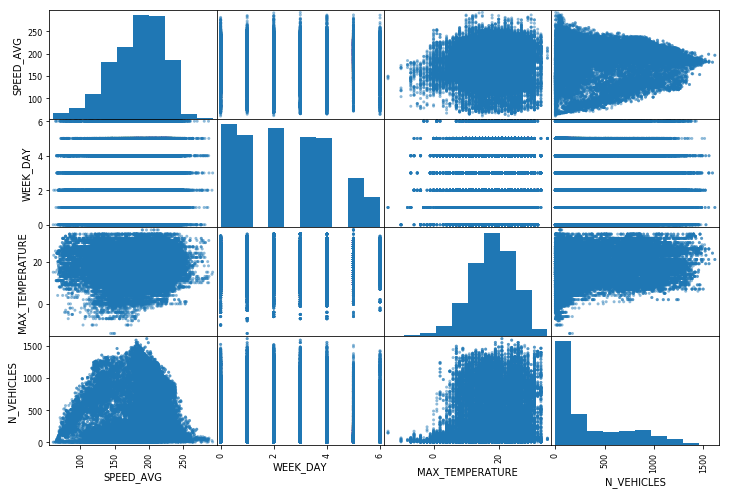

In [14]:
attributes = ['SPEED_AVG','WEEK_DAY','MAX_TEMPERATURE','N_VEHICLES']
scatter_matrix(df[attributes], figsize = (12,8))

In [7]:
catOneHot_col = []
for i in cat_col:
    one_hot = pd.get_dummies(df[i])
    df = df.drop(i,axis = 1)
    catOneHot_col.extend(one_hot.columns)
    df = df.join(one_hot)
df.columns    

Index(['Unnamed: 0', 'Unnamed: 0.1', 'START_DATETIME_UTC', 'END_DATETIME_UTC',
       'EVENT_DETAIL', 'KM_END', 'KM_START', 'KEY', 'KEY_2_x', 'DATETIME_UTC',
       'KM', 'SPEED_AVG', 'SPEED_SD', 'SPEED_MIN', 'SPEED_MAX', 'N_VEHICLES',
       'KEY_2_y', 'DISTANCE_FROM_POINT', 'LENGTH_KM', 'WEEK_DAY',
       'DELTA_TIME_FROM_START', 'EMERGENCY_LANE', 'LANES', 'ROAD_TYPE',
       'STATION_ID', 'TEMPERATURE', 'MAX_TEMPERATURE', 'MIN_TEMPERATURE',
       'DATETIME_UTC_WEATHER', 'Allarme', 'Barriere', 'Calamita_naturale',
       'Gestione_viabilita', 'Manutenzione_opere_in_verde', 'Meteo',
       'Opera_arte', 'Ostacolo_in_carreggiata', 'Pavimentazione',
       'Regimazione_delle_acque', 'Segnaletica_orizzontale',
       'Segnaletica_verticale', 'Veicolo_in_avaria', 'extended_accident',
       'DebolePioggia', 'FortePioggia', 'Foschia', 'Fumo', 'Neve',
       'QuasiSereno', 'Afternoon', 'EarlyMorning', 'Evening', 'LateEvening',
       'LateMorning', 'Night'],
      dtype='object')

In [ ]:
features = list(num_col) + list(catOneHot_col)

X = df[features]
y = df['SPEED_AVG']
forest = ExtraTreesRegressor(n_estimators=750, random_state=0, bootstrap=True,criterion='mae', oob_score = True)
forest.fit(X, y)

In [114]:
forest.oob_score_

0.9385315489914992

In [8]:

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")

plt.xlim([-1, X.shape[1]])
plt.show()

NameError: name 'forest' is not defined

In [24]:
x_train = df[list(features)].values
y_train = df["SPEED_AVG"].values

gb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=750,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:gamma',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


xgb_param = gb.get_xgb_params()
xgtrain = xgb.DMatrix(df[features].values, label=df['SPEED_AVG'].values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=gb.get_params()['n_estimators'], nfold=10, metrics='mae', early_stopping_rounds=50)
gb.set_params(n_estimators=cvresult.shape[0])
    
   
gb.fit(x_train, y_train,eval_metric='mae')
        
    

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=750,
       n_jobs=1, nthread=4, objective='reg:gamma', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [27]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
predictions = gb.predict(x_train)        

print ("MAE Score (Train): %f" % mean_absolute_error(y_train,predictions))

print("MAE Score (Test): %f" %cvresult['test-mae-mean'].tail(1))

print ("MAPE Score (Train): %f" % mean_absolute_percentage_error(y_train,predictions))
print ("R2 Score (Train): %f" % r2_score(y_train,predictions))

MAE Score (Train): 9.901258
MAE Score (Test): 11.074770
MAPE Score (Train): 6.092827
R2 Score (Train): 0.859994


In [37]:
test = pd.read_csv('test.csv', dtype={col: np.float32 for col in num_col})
catOneHot_col = []
for i in cat_col:
    one_hot = test.get_dummies(test[i])
    test = test.drop(i,axis = 1)
    catOneHot_col.extend(one_hot.columns)
    test = test.join(one_hot)
#df.columns 

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [38]:
test

,EVENT_DETAIL,EVENT_TYPE,KEY,DATETIME_UTC,KM,SPEED_AVG,DISTANCE_FROM_POINT,LENGTH_KM,WEEK_DAY,TIME_INTERVAL,DELTA_TIME_FROM_START,EMERGENCY_LANE,LANES,ROAD_TYPE,TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE,WEATHER
0,54.0,Gestione_viabilita,29.0,2018-11-23 00:15:00,275.0,185.459617,37.0,39.0,4.0,Night,8.900000,0.0,2.0,2.0,7.0,11.0,7.0,QuasiSereno
1,54.0,Gestione_viabilita,29.0,2018-11-23 00:30:00,275.0,187.076472,37.0,39.0,4.0,Night,23.900000,0.0,2.0,2.0,7.0,11.0,7.0,QuasiSereno
2,11.0,Veicolo_in_avaria,16.0,2018-11-23 00:45:00,556.0,231.650955,0.0,0.0,4.0,Night,1433.900024,1.0,3.0,1.0,11.0,18.0,11.0,QuasiSereno
3,54.0,Gestione_viabilita,29.0,2018-11-23 00:45:00,275.0,174.821664,37.0,39.0,4.0,Night,38.900002,0.0,2.0,2.0,8.0,11.0,7.0,QuasiSereno
4,11.0,Veicolo_in_avaria,16.0,2018-11-23 00:45:00,555.0,224.242233,-1.0,0.0,4.0,Night,1433.900024,1.0,3.0,1.0,11.0,18.0,11.0,QuasiSereno
5,11.0,Veicolo_in_avaria,16.0,2018-11-23 01:00:00,556.0,236.265628,0.0,0.0,4.0,Night,8.900000,1.0,3.0,1.0,11.0,18.0,11.0,QuasiSereno
6,54.0,Gestione_viabilita,29.0,2018-11-23 01:00:00,275.0,187.292106,37.0,39.0,4.0,Night,53.900002,0.0,2.0,2.0,8.0,11.0,7.0,QuasiSereno
7,11.0,Veicolo_in_avaria,16.0,2018-11-23 01:00:00,555.0,229.337224,-1.0,0.0,4.0,Night,8.900000,1.0,3.0,1.0,11.0,18.0,11.0,QuasiSereno
8,11.0,Veicolo_in_avaria,16.0,2018-11-23 01:15:00,555.0,227.047609,-1.0,0.0,4.0,Night,23.900000,1.0,3.0,1.0,11.0,18.0,11.0,QuasiSereno
9,11.0,Veicolo_in_avaria,16.0,2018-11-23 01:15:00,556.0,233.518791,0.0,0.0,4.0,Night,23.900000,1.0,3.0,1.0,11.0,18.0,11.0,QuasiSereno


In [ ]:
#snippet per joinare la colonna dei risultati al dataset
df = df.join(predictions)

In [ ]:
#snippet per generare il csv finale
cols=['','', '']


output = test[cols]
output = output.groupby('').sum()
output.to_csv('RS.csv')